In [ ]:
#Installing geopandas
!pip install geopandas

In [47]:
#Importing the libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [48]:
#Openning the data
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-21/gdpr_violations.tsv"
df = pd.read_csv(url, sep='\t')
df.head()

,id,picture,name,price,authority,date,controller,article_violated,type,source,summary
0,1,https://www.privacyaffairs.com/wp-content/uplo...,Poland,9380,Polish National Personal Data Protection Offic...,10/18/2019,Polish Mayor,Art. 28 GDPR,Non-compliance with lawful basis for data proc...,https://uodo.gov.pl/decyzje/ZSPU.421.3.2019,No data processing agreement has been conclude...
1,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,10/17/2019,UTTIS INDUSTRIES,Art. 12 GDPR|Art. 13 GDPR|Art. 5 (1) c) GDPR|A...,Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
2,3,https://www.privacyaffairs.com/wp-content/uplo...,Spain,60000,Spanish Data Protection Authority (AEPD),10/16/2019,Xfera Moviles S.A.,Art. 5 GDPR|Art. 6 GDPR,Non-compliance with lawful basis for data proc...,https://www.aepd.es/resoluciones/PS-00262-2019...,The company had unlawfully processed the perso...
3,4,https://www.privacyaffairs.com/wp-content/uplo...,Spain,8000,Spanish Data Protection Authority (AEPD),10/16/2019,Iberdrola Clientes,Art. 31 GDPR,Failure to cooperate with supervisory authority,https://www.aepd.es/resoluciones/PS-00304-2019...,Iberdrola Clientes violated Article 13 of the ...
4,5,https://www.privacyaffairs.com/wp-content/uplo...,Romania,150000,Romanian National Supervisory Authority for Pe...,10/09/2019,Raiffeisen Bank SA,Art. 32 GDPR,Failure to implement sufficient measures to en...,https://www.dataprotection.ro/?page=Comunicat_...,Raiffeisen Bank Romania did not observe the ne...


In [49]:
#Returning the label of each column in the DataFrame
df.columns

Index(['id', 'picture', 'name', 'price', 'authority', 'date', 'controller',
       'article_violated', 'type', 'source', 'summary'],
      dtype='object')

In [50]:
#Calculating some statistical data like percentile, mean and std of the numerical values of the data
df.describe()

,id,price
count,250.000000,2.500000e+02
mean,125.500000,6.132140e+05
std,72.312977,3.980372e+06
min,1.000000,0.000000e+00
25%,63.250000,2.500000e+03
50%,125.500000,1.050000e+04
75%,187.750000,6.000000e+04
max,250.000000,5.000000e+07


In [51]:
#Getting the information which contains the number of columns, column labels, column data types, memory usage, range index and the number of cells in each column (non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                250 non-null    int64 
 1   picture           250 non-null    object
 2   name              250 non-null    object
 3   price             250 non-null    int64 
 4   authority         250 non-null    object
 5   date              250 non-null    object
 6   controller        250 non-null    object
 7   article_violated  250 non-null    object
 8   type              250 non-null    object
 9   source            250 non-null    object
 10  summary           250 non-null    object
dtypes: int64(2), object(9)
memory usage: 21.6+ KB


In [52]:
#Checking for missing values and from the info we do not have any missing value because a return of 0.
df.isna().sum()

id                  0
picture             0
name                0
price               0
authority           0
date                0
controller          0
article_violated    0
type                0
source              0
summary             0
dtype: int64

**EXPLORING THE DATA**

**1. Time breakdown of the total violations in the EU.** 

In [53]:
# Converting date column to pandas datetime format
df['date'] = pd.to_datetime(df['date'])
# Grouping by year and month, and summing up the number of violations for each group
time_breakdown = df.groupby([df['date'].dt.year, df['date'].dt.month]).agg({'article_violated': 'count'})
time_breakdown.index.names = ['Year', 'Month']  # Rename index to 'Year' and 'Month' for clarity
print(time_breakdown)

            article_violated
Year Month                  
1970 1                    15
2018 5                     1
     7                     1
     9                     1
     10                    1
     11                    2
     12                    5
2019 1                    10
     2                    13
     3                    14
     4                    11
     5                     9
     6                     9
     7                    12
     8                     8
     9                    10
     10                   30
     11                   23
     12                   21
2020 1                    13
     2                    21
     3                    20


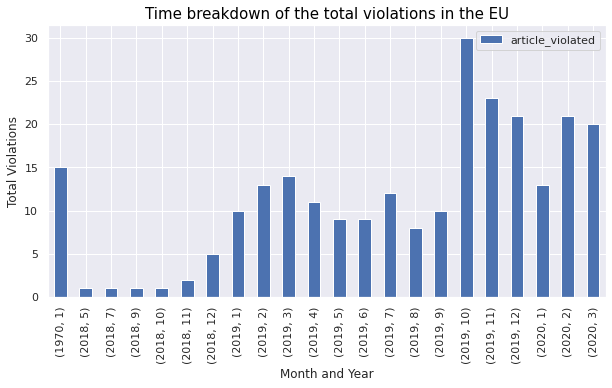

<Figure size 1080x576 with 0 Axes>

In [54]:
time_breakdown.plot(kind='bar', figsize=(10, 5))
plt.title("Time breakdown of the total violations in the EU", fontsize= 15, color ="black")
plt.xlabel('Month and Year')
plt.ylabel('Total Violations')
plt.show()
plt.savefig("Time breakdown.png")

**2. Most expensive violation by country, listing the specific violation type e.g failure to comply with processing regulation.**

In [55]:
most_expensive_violation = df.groupby('name')['price'].max().sort_values(ascending=False)[:10]
most_expensive_violation

name
France            50000000
Italy             27802946
Austria           18000000
Germany           14500000
Sweden             7000000
Bulgaria           2600000
Netherlands         900000
Poland              644780
Portugal            400000
United Kingdom      320000
Name: price, dtype: int64

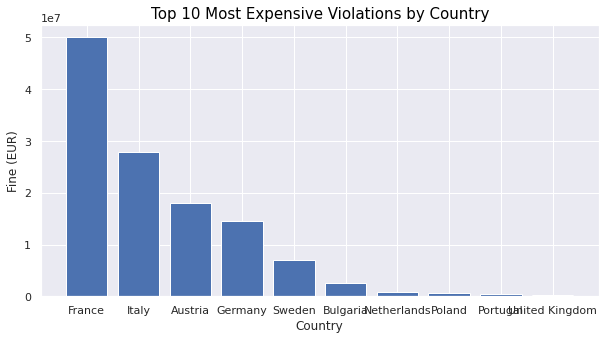

<Figure size 1080x576 with 0 Axes>

In [56]:
# Plot the bar graph
plt.figure(figsize=(10, 5))
plt.bar(most_expensive_violation.index, most_expensive_violation.values)
plt.xlabel('Country')
plt.ylabel('Fine (EUR)')
plt.title('Top 10 Most Expensive Violations by Country', fontsize=15, color = 'black')
plt.show()
plt.savefig("Most Expensive Violation.png")

**3. Vodafone's GDPR violations in volume.**

In [57]:
# Sorting the names in the column 'Name' that start with 'vodafone'
Vodafone_names = df[df['controller'].str.startswith('Vodafone')].sort_values('controller')
# Print the sorted names
print(Vodafone_names['controller'])

82             Vodafone Espana
194            Vodafone Espana
159            Vodafone Espana
158            Vodafone Espana
145            Vodafone Espana
144            Vodafone Espana
195            Vodafone Espana
142            Vodafone Espana
141            Vodafone Espana
91             Vodafone Espana
89             Vodafone Espana
224            Vodafone España
223            Vodafone España
222            Vodafone España
220            Vodafone España
214            Vodafone España
205    Vodafone España, S.A.U.
203    Vodafone España, S.A.U.
202    Vodafone España, S.A.U.
201    Vodafone España, S.A.U.
143               Vodafone ONO
213               Vodafone ONO
237           Vodafone Romania
239           Vodafone Romania
Name: controller, dtype: object


In [58]:
# Create a subset of the dataframe where controller starts with "Vodafone"
vodafone_subset = df[df['controller'].str.startswith('Vodafone')]
# Count the number of Vodafone GDPR violations
num_vodafone_violations = len(vodafone_subset)
# Print the number of Vodafone GDPR violations
print(f"Vodafone has {num_vodafone_violations} GDPR violations.")

Vodafone has 24 GDPR violations.


**4. Companies with the highest violations.**

In [59]:
#Get a count of the number of GDPR violations by companies
company_counts = df['controller'].value_counts().nlargest(10)
company_counts

Unknown                    15
Vodafone Espana            11
Not available               6
Vodafone España             5
Private individual          5
Xfera Moviles S.A.          4
Not disclosed               4
Vodafone España, S.A.U.     4
Restaurant                  3
Telefónica SA               2
Name: controller, dtype: int64

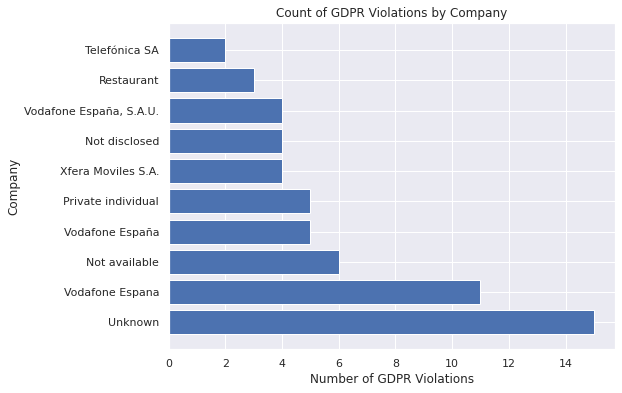

<Figure size 1080x576 with 0 Axes>

In [60]:
#top_companies = df['controller'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(company_counts.index, company_counts.values)
ax.set_xlabel("Number of GDPR Violations")
ax.set_ylabel("Company")
ax.set_title("Count of GDPR Violations by Company")
plt.show()
plt.savefig("Companies with the highest violations.png")

**5. Map the data and make this interactive.**

In [ ]:
# Group the dataframe by country and count the number of violations for each country
country_counts = df.groupby('name')['price'].count().reset_index(name='violation_count')
country_counts.head()

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(5)

<ipython-input-68-92188edfbdb9>:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm, orientation='horizontal')  # change orientation to horizontal


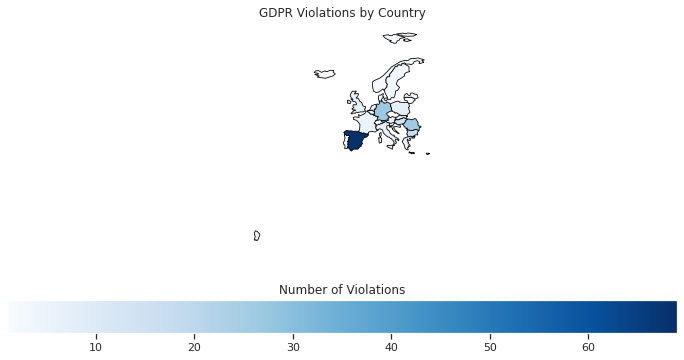

<Figure size 1080x576 with 0 Axes>

In [68]:
# Join the violation counts to the world map based on the country names
merged = world.merge(df.groupby('name').size().reset_index(name='violation_count'), left_on='name', right_on='name')

fig, ax = plt.subplots(figsize=(12, 6))
merged.plot(column='violation_count', cmap='Blues', linewidth=0.8, edgecolor='black', ax=ax)
ax.axis('off')
ax.set_title('GDPR Violations by Country')
# Add a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=merged['violation_count'].min(), vmax=merged['violation_count'].max()))
sm._A = []
cbar = fig.colorbar(sm, orientation='horizontal')  # change orientation to horizontal
cbar.ax.set_title('Number of Violations')
plt.show()
plt.savefig("GDPR violations by country.png")

**6. Breakdown / Distribution and important metrics of fines levied per article. Prepare a Box, plot.**

In [69]:
# Grouping the data by article and calculating various metrics
article_stats = df.groupby('article_violated')['price'].agg(['count', 'sum', 'mean', 'median', 'min', 'max'])
article_stats['percent_of_total_fine'] = article_stats['sum'] / article_stats['sum'].sum()
article_stats

,count,sum,mean,median,min,max,percent_of_total_fine
article_violated,,,,,,,
Art. 58 GDPR,1,2000,2000.0,2000.0,2000,2000,0.000013
Art 6 (1) GDPR|Art 58 (2) e) GDPR|Art 83 (5) a) GDPR,1,28100,28100.0,28100.0,28100,28100,0.000183
Art. 12 (3) GDPR|Art. 15 (1) GDPR,1,511,511.0,511.0,511,511,0.000003
Art. 12 (4) GDPR|Art. 15 GDPR,1,1121,1121.0,1121.0,1121,1121,0.000007
Art. 12 (4) GDPR|Art. 15 GDPR|Art. 18 (1) c) GDPR|Art. 13 GDPR,1,3200,3200.0,3200.0,3200,3200,0.000021
...,...,...,...,...,...,...,...
Art.14 GDPR,2,320000,160000.0,160000.0,100000,220000,0.002087
Art.14 of the GDPR,1,140000,140000.0,140000.0,140000,140000,0.000913
Data Protection Act 2018,1,80000,80000.0,80000.0,80000,80000,0.000522


In [70]:
# Get the top 25 most frequently violated articles
top_25_articles = df['article_violated'].value_counts().nlargest(5).index.tolist()
# Filter the data to only include the top 5 articles
top_25_violations = df[df['article_violated'].isin(top_25_articles)]

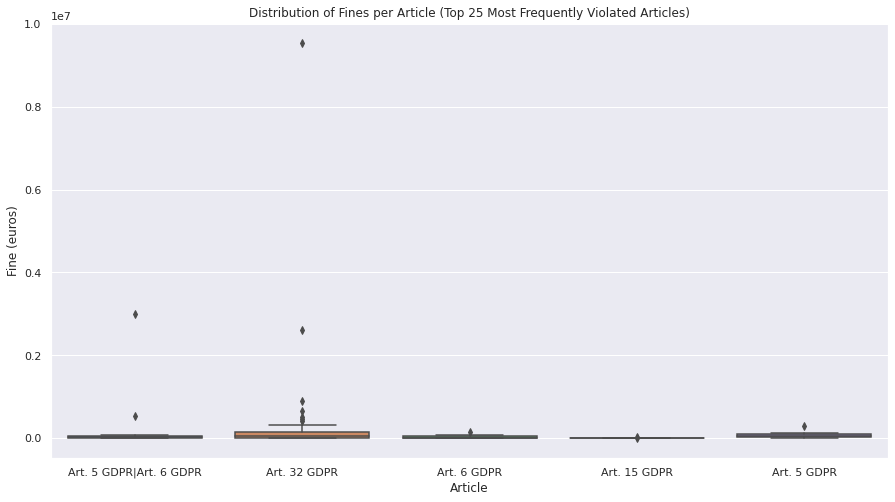

<Figure size 1080x576 with 0 Axes>

In [74]:
# Create a boxplot of fines per article using seaborn
sns.boxplot(x='article_violated', y='price', data=top_25_violations)
sns.set(rc={'figure.figsize':(15,8)})
plt.title('Distribution of Fines per Article (Top 25 Most Frequently Violated Articles)')
plt.xlabel('Article')
plt.ylabel('Fine (euros)')
plt.show()
plt.savefig("Distribution of Fines per Article.png")

**7. Top 10 most violated articles**

In [71]:
most_violated_articles = df['article_violated'].value_counts().sort_values(ascending=False)
print("Top 10 most violated articles:")
most_violated_articles.head(10)

Top 10 most violated articles:


Art. 32 GDPR                       40
Art. 6 GDPR                        33
Art. 5 GDPR|Art. 6 GDPR            20
Art. 15 GDPR                       10
Art. 5 GDPR                        10
Art. 5 (1) f) GDPR|Art. 32 GDPR    10
Art. 5 (1) f) GDPR                  7
Art. 13 GDPR                        7
Art. 5 (1) a) GDPR|Art. 6 GDPR      6
Art. 5 (1) c) GDPR                  6
Name: article_violated, dtype: int64

**8. Article with the highest associated fine**

In [72]:
highest_associated_fine = df.groupby("article_violated")["price"].max()
highest_associated_fine.sort_values(ascending=False, inplace=True)
highest_associated_fine


article_violated
Art. 13 GDPR|Art. 14 GDPR|Art. 6 GDPR|Art. 4 GDPR|Art. 5 GDPR              50000000
Art. 58(2) GDPR                                                            27802946
Art. 5 (1) a) GDPR|Art. 6 GDPR                                             18000000
Art. 5 GDPR|Art. 25 GDPR                                                   14500000
Art. 32 GDPR                                                                9550000
                                                                             ...   
Art. 6 GDPR|Art. 7 GDPR                                                         588
Art. 12 (3) GDPR|Art. 15 (1) GDPR                                               511
Art. 5 (1) a) GDPR|Art. 9 (1) GDPR|Art. 9 (2) GDPR|Art. 6 (1) GDPR              510
Art. 15 (1), (3) GDPR                                                             0
Failure to implement sufficient measures to ensure information security           0
Name: price, Length: 88, dtype: int64

In [73]:
# Sort the dataframe by fine in descending order
df_sorted = df.sort_values(by='price', ascending=False)

# Select the first row (i.e., the row with the highest fine)
article_with_highest_fine = df_sorted.iloc[0]['article_violated']

# Print the article with the highest fine
print("Article with the highest associated fine:", article_with_highest_fine)

Article with the highest associated fine: Art. 13 GDPR|Art. 14 GDPR|Art. 6 GDPR|Art. 4 GDPR|Art. 5 GDPR
